# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness, however, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed, however in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

## Perform API Calls

In [5]:
# OpenWeatherMap API Key
api_key = "b40bdf39b83a1fb8d9aa31df28105301"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=husavik
Processing Record 2 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=busselton
Processing Record 3 of Set 1 | payakumbuh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=payakumbuh
Processing Record 4 of Set 1 | sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=sale
Processing Record 5 of Set 1 | cozumel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=cozumel
Processing Record 6 of Set 1 | windhoek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=windhoek
Processing Record 7 of Set 1 | iqa

Processing Record 4 of Set 2 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=fortuna
Processing Record 5 of Set 2 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=vanimo
Processing Record 6 of Set 2 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=atar
Processing Record 7 of Set 2 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=klaksvik
Processing Record 8 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=qaanaaq
Processing Record 9 of Set 2 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=avarua
Processing Record 10 of Set 2 | gulshat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 9 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=chokurdakh
Processing Record 10 of Set 3 | cavalcante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=cavalcante
Processing Record 11 of Set 3 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=mar%20del%20plata
Processing Record 12 of Set 3 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=bandarbeyla
Processing Record 13 of Set 3 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=hilo
Processing Record 14 of Set 3 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=okhotsk
Processing Record 15 of Set 3 | sentyabrskiy
http://api.openweath

Processing Record 13 of Set 4 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=tuatapere
Processing Record 14 of Set 4 | tekeli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=tekeli
Processing Record 15 of Set 4 | jiangyou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=jiangyou
Processing Record 16 of Set 4 | bulawayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=bulawayo
Processing Record 17 of Set 4 | suda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=suda
Processing Record 18 of Set 4 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=sakakah
Processing Record 19 of Set 4 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 16 of Set 5 | collie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=collie
Processing Record 17 of Set 5 | santa cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=santa%20cruz
Processing Record 18 of Set 5 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=baruun-urt
Processing Record 19 of Set 5 | tambul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=tambul
Processing Record 20 of Set 5 | kashipur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=kashipur
Processing Record 21 of Set 5 | dniprovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=dniprovka
Processing Record 22 of Set 5 | pangody
http://api.openweathermap.org/data/2.5

Processing Record 20 of Set 6 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=krasnoselkup
Processing Record 21 of Set 6 | khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=khasan
Processing Record 22 of Set 6 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=hami
Processing Record 23 of Set 6 | skara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=skara
Processing Record 24 of Set 6 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=labuhan
Processing Record 25 of Set 6 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=guerrero%20negro
Processing Record 26 of Set 6 | alyangula
http://api.openweathermap.org/data/2.5

Processing Record 24 of Set 7 | loukhi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=loukhi
Processing Record 25 of Set 7 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=carutapera
Processing Record 26 of Set 7 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=cabo%20san%20lucas
Processing Record 27 of Set 7 | meyungs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=meyungs
Processing Record 28 of Set 7 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=bubaque
Processing Record 29 of Set 7 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=margate
Processing Record 30 of Set 7 | toktogul
http://api.openweathermap.org/d

Processing Record 28 of Set 8 | shetpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=shetpe
Processing Record 29 of Set 8 | las vegas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=las%20vegas
Processing Record 30 of Set 8 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=olafsvik
Processing Record 31 of Set 8 | grimari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=grimari
Processing Record 32 of Set 8 | bana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=bana
Processing Record 33 of Set 8 | old town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=old%20town
Processing Record 34 of Set 8 | jalu
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 33 of Set 9 | the valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=the%20valley
Processing Record 34 of Set 9 | mgachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=mgachi
Processing Record 35 of Set 9 | vershino-darasunskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=vershino-darasunskiy
Processing Record 36 of Set 9 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=laguna
Processing Record 37 of Set 9 | paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=paita
Processing Record 38 of Set 9 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=tiksi
Processing Record 39 of Set 9 | omaruru
http://api.openweathermap.org/da

Processing Record 37 of Set 10 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=kruisfontein
Processing Record 38 of Set 10 | muroto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=muroto
Processing Record 39 of Set 10 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=coihaique
Processing Record 40 of Set 10 | satitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=satitoa
Processing Record 41 of Set 10 | fort saint john
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=fort%20saint%20john
Processing Record 42 of Set 10 | kamaishi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=kamaishi
Processing Record 43 of Set 10 | lafiagi
http://api.op

Processing Record 41 of Set 11 | bellmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=bellmore
Processing Record 42 of Set 11 | beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=beloha
Processing Record 43 of Set 11 | akom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=akom
Processing Record 44 of Set 11 | kunya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=kunya
Processing Record 45 of Set 11 | karamea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=karamea
Processing Record 46 of Set 11 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=waipawa
Processing Record 47 of Set 11 | phan thiet
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 45 of Set 12 | kokopo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=kokopo
Processing Record 46 of Set 12 | novichikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=novichikha
Processing Record 47 of Set 12 | arras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=arras
Processing Record 48 of Set 12 | along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=along
Processing Record 49 of Set 12 | san jose
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=san%20jose
Processing Record 0 of Set 13 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b40bdf39b83a1fb8d9aa31df28105301&q=honiara
-----------------------------
Data Retrieval Complete      
-----------------------------

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          601
Cloudiness    601
Country       601
Date          601
Humidity      601
Lat           601
Lng           601
Max Temp      601
Wind Speed    601
dtype: int64

In [7]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,husavik,0,IS,1509170400,46,66.04,-17.34,50.00,10.29
1,busselton,80,AU,1509175121,96,-33.65,115.33,65.66,27.22
2,payakumbuh,8,ID,1509175122,91,-0.22,100.63,82.44,2.73
3,sale,75,MA,1509174000,93,34.04,-6.82,60.80,1.12
4,cozumel,75,MX,1509169620,83,20.51,-86.95,77.00,11.41


## Latitude vs Temperature Plot

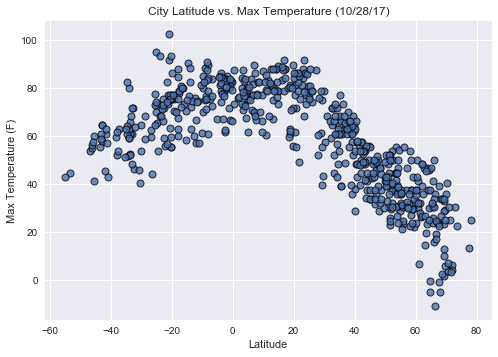

In [10]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

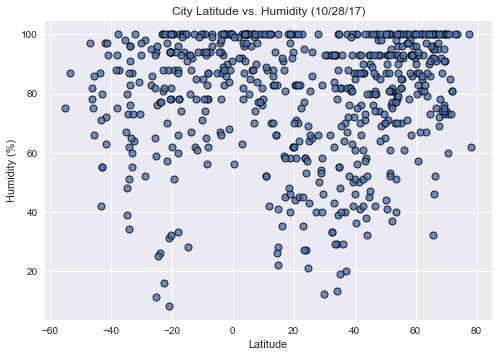

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

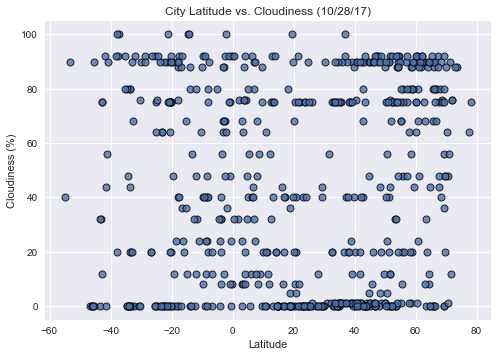

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

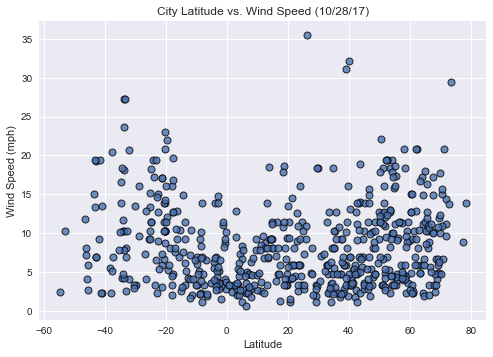

In [13]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()